<a href="https://colab.research.google.com/github/nguyenthanh222/phantichdulieu/blob/main/cifar10ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape (50000, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten) 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


FileNotFoundError: ignored

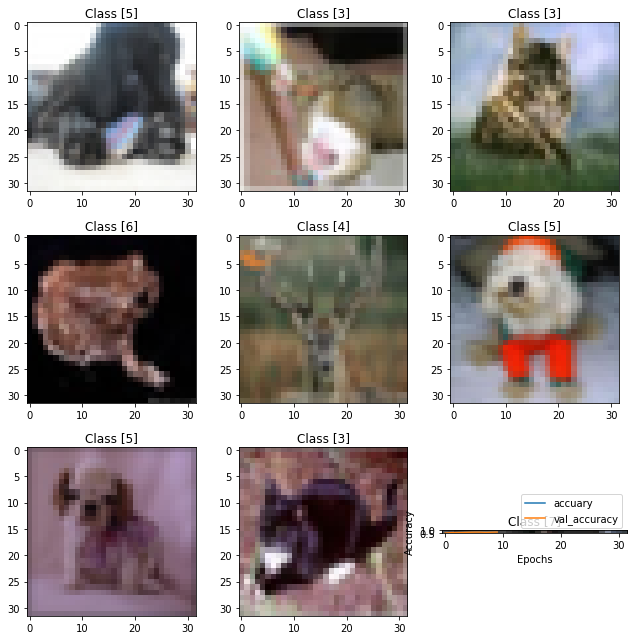

In [11]:


import numpy as np
import torchvision
import torch.nn as nn
import tensorflow as tf
# hàm này để hiển thị các tấm ảnh 
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from tensorflow.keras import datasets, layers, models
# để chọn ngẫu nhiên các tấm ảnh
import random
import os
# để load dữ liệu trong tập mẫu
from keras.datasets import cifar10
from keras.models import load_model
from matplotlib import image
# các hàm sau để xây dựng mô hình mạng neural 
# thêm 1 lớp, thêm hàm kích hoạt activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Activation
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
def load_image(filename):
  # load tấm ảnh lên
  img = load_img(filename, grayscale=True, target_size=(32, 32))
  # chuyển về dạng vector
  img=img_to_array(img)
	# reshape into a single sample with 1 channel
  img=img.reshape(1,1024)
  img=img.astype('float32')
  #chuẩn hóa dữ liệu về 0-1
  img=img/255.0
  return img

# dữ liệu trong tập data mnist là 60000 tấm ảnh trắng đen có kích thước là 28X28 pixel
# mỗi pixel có giá trị từ 0-255, 0 là màu đen và 255 là màu trắng sáng nhất
# các giá trị càng gần với 255 thì càng sáng
# xem shape của tập train, sau khi xem thì ta sẽ thấy thông tin x_train shape (60000, 28, 28)
# nghĩa là có 60000 tấm ảnh trong tập train, mỗi tấm ảnh có kích thước 28*28

print("x_train shape",x_train.shape)

plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num],cmap='gray',interpolation=None)
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()  

train_images, test_images = x_train / 255.0, x_test / 255.0
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))
plt.plot(history.history['accuracy'], label='accuary')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)
#load 1 tấm ảnh cần dự báo
image_test = load_image('hinhanh.JPG')

#dụ báo tấm ảnh này 
digit = model.predict(image_test)
print('Du bao day la :',digit[0].argmax())
